In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv("../.env")
DATASET_PATH=os.getenv("DATASET_DIRECTORY")
MODEL_TRAINING_DATASET_PATH=os.getenv("MODEL_TRAINING_DATASET_PATH")
GENERATED_DATASETS_PATH=os.getenv("GENERATED_DATASETS_PATH")


sys.path.append("../")
from cpsl_datasets.gnn_node_ds import GnnNodeDS

from mmwave_model_integrator.input_encoders._node_encoder import _NodeEncoder
from mmwave_model_integrator.ground_truth_encoders._gt_node_encoder import _GTNodeEncoder
from mmwave_model_integrator.plotting.plotter_gnn_pc_processing import PlotterGnnPCProcessing


/home/david/.cache/pypoetry/virtualenvs/odometry-JJ4jnFPp-py3.10/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#initialize the dataset
dataset_path = os.path.join(DATASET_PATH,"gnn_train")
dataset = GnnNodeDS(
    dataset_path=dataset_path,
    node_folder="nodes",
    label_folder="labels"
)
print(dataset_path)

found 393 node samples
found 393 label samples
/data/radnav/radnav_model_train_datasets/gnn_train


In [3]:
#initialize the encoder and decoder
input_encoder = _NodeEncoder()
ground_truth_encoder = _GTNodeEncoder()
plotter = PlotterGnnPCProcessing()

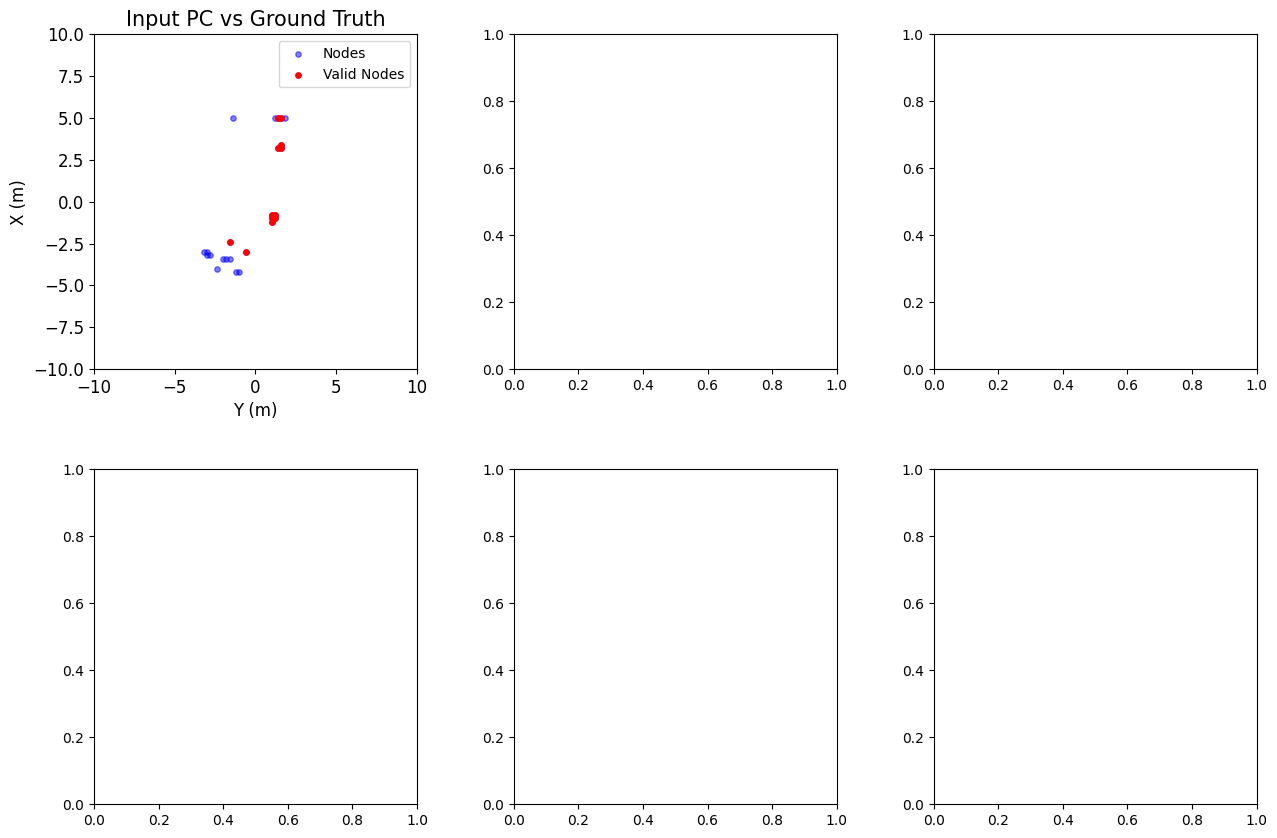

In [4]:
#plot a sample from the training dataset
nodes = dataset.get_node_data(idx=1)
labels = dataset.get_label_data(idx=1)

plotter.plot_compilation(
    nodes=nodes,
    labels=labels,
    input_encoder=input_encoder,
    ground_truth_encoder=ground_truth_encoder,
    show=True
)

In [5]:
from mmwave_model_integrator.config import Config
import mmwave_model_integrator.torch_training.trainers as trainers

config_path = "../configs/sage_gnn_base.py"
config = Config(config_path)

config.print_config()

trainer_config = config.trainer
trainer_class = getattr(trainers,trainer_config.pop('type'))
trainer = trainer_class(**trainer_config)

model=dict(
    type=SageGNNClassifier,
    in_channels=4,
    hidden_channels=16,
    out_channels=1,
),
generated_dataset=dict(
    input_encoding_folder=nodes,
    ground_truth_encoding_folder=labels,
    generated_dataset_path=/data/radnav/radnav_model_train_datasets/gnn_train,
),
trainer=dict(
    type=GNNTorchTrainer,
    model=dict(
        type=SageGNNClassifier,
        in_channels=4,
        hidden_channels=16,
        out_channels=1,
    ),
    optimizer=dict(
        type=Adam,
        lr=0.001,
    ),
    loss_fn=dict(
        type=BCELoss,
    ),
    dataset=dict(
        type=_GnnNodeDataset,
        edge_radius=5.0,
        transforms=[],
    ),
    data_loader=dict(
        type=TGDataLoader,
        batch_size=32,
        shuffle=True,
        num_workers=4,
    ),
    dataset_path=/data/radnav/radnav_model_train_datasets/gnn_train,
    node_directory=nodes,
    label_directory=labels,
    val_split=0.15,
    working_dir=working_dir,
    save_name=Sage_GNN,
    epochs

ModelTrainer.train: training the network...


 10%|█         | 1/10 [00:04<00:37,  4.21s/it]

EPOCH: 1/10
	 Train loss: 0.7667728066444397, Val loss:1.368187665939331


 20%|██        | 2/10 [00:08<00:33,  4.22s/it]

EPOCH: 2/10
	 Train loss: 0.7479903101921082, Val loss:1.3524483442306519


 30%|███       | 3/10 [00:12<00:29,  4.20s/it]

EPOCH: 3/10
	 Train loss: 0.7426809072494507, Val loss:1.3435314893722534


 40%|████      | 4/10 [00:16<00:25,  4.23s/it]

EPOCH: 4/10
	 Train loss: 0.7360950112342834, Val loss:1.3310105800628662


 50%|█████     | 5/10 [00:21<00:20,  4.20s/it]

EPOCH: 5/10
	 Train loss: 0.729374349117279, Val loss:1.3198285102844238


 60%|██████    | 6/10 [00:25<00:16,  4.19s/it]

EPOCH: 6/10
	 Train loss: 0.722776472568512, Val loss:1.3042774200439453


 70%|███████   | 7/10 [00:29<00:12,  4.19s/it]

EPOCH: 7/10
	 Train loss: 0.7150110602378845, Val loss:1.2908222675323486


 80%|████████  | 8/10 [00:33<00:08,  4.18s/it]

EPOCH: 8/10
	 Train loss: 0.7074863314628601, Val loss:1.2718487977981567


 90%|█████████ | 9/10 [00:37<00:04,  4.18s/it]

EPOCH: 9/10
	 Train loss: 0.6972156763076782, Val loss:1.2555382251739502


100%|██████████| 10/10 [00:41<00:00,  4.18s/it]

EPOCH: 10/10
	 Train loss: 0.6882361769676208, Val loss:1.236311435699463
ModelTrainer.train: total training time 41.83


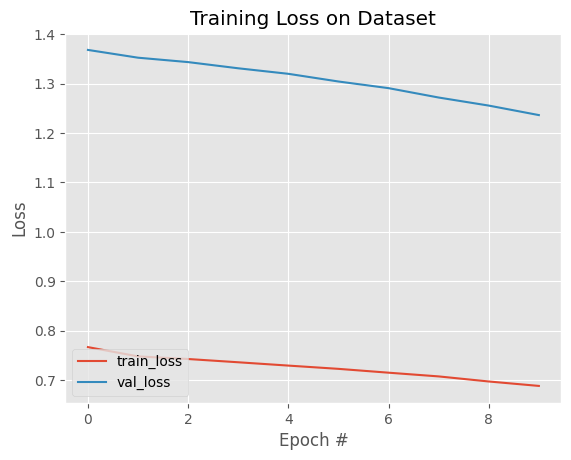

In [6]:
trainer.train_model()

In [5]:
#testing the output
from mmwave_model_integrator.model_runner.gnn_runner import GNNRunner
from mmwave_model_integrator.torch_training.models.SAGEGnn import SageGNNClassifier

runner = GNNRunner(
    model= SageGNNClassifier(
        in_channels=4,
        hidden_channels=16,
        out_channels=1
    ),state_dict_path="/home/david/Documents/odometry/submodules/mmwave_model_integrator/notebooks/working_dir/Sage_GNN.pth",
    cuda_device="cuda:0",
    edge_radius=5.0
)

_ModelRunner: using GPU: cuda:0


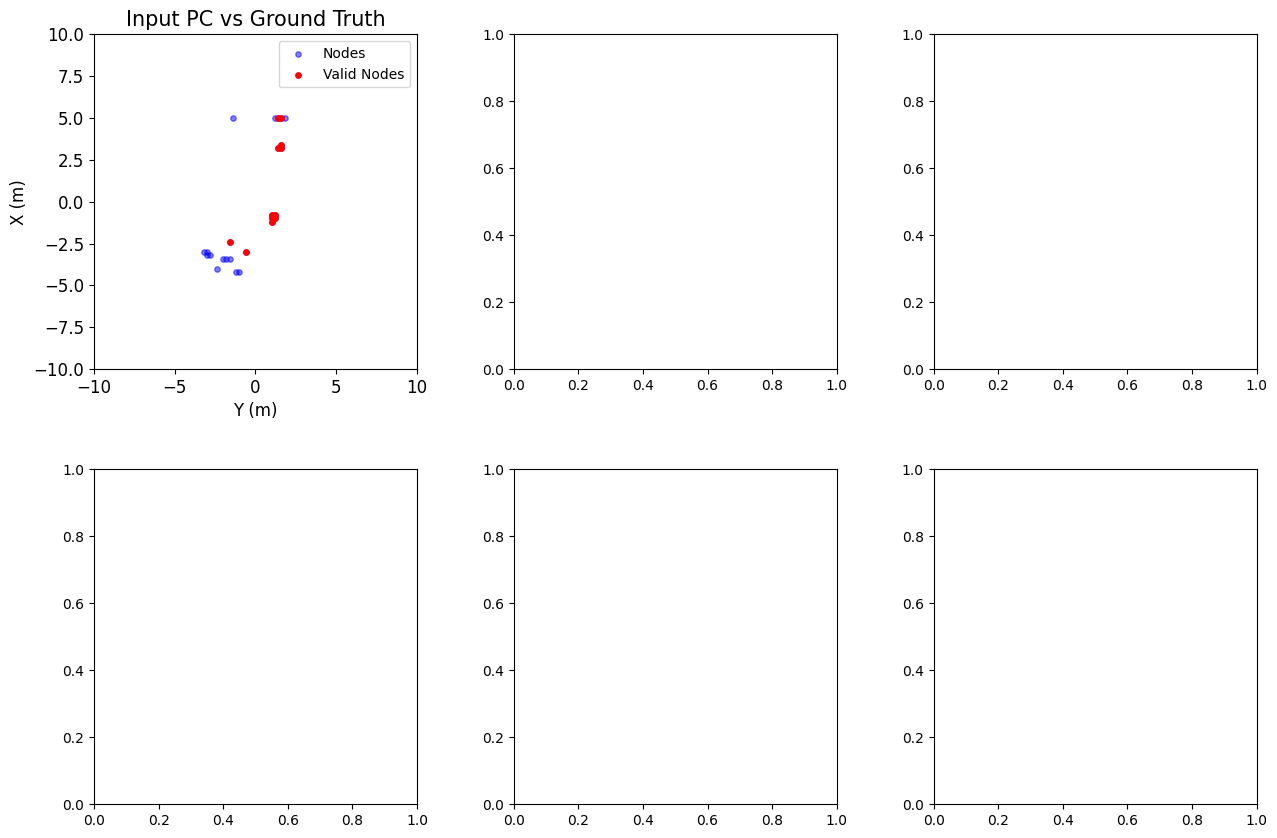

In [6]:
#plot a sample from the training dataset
nodes = dataset.get_node_data(idx=1)
labels = dataset.get_label_data(idx=1)

pred_nodes = runner.make_prediction(nodes)

plotter.plot_compilation(
    nodes=nodes,
    labels=labels,
    input_encoder=input_encoder,
    ground_truth_encoder=ground_truth_encoder,
    show=True
)